In [51]:
from MADLens import *
from vmad import *
import numpy as np
import matplotlib.pyplot as plt

In [89]:
@autooperator('a->b')
def modulo(a,y):
    b = a%y
    return dict(b=b)


mod = modulo.build(y=np.ones(3)*10.1)
res, tape = mod.compute(init=dict(a=np.ones((100,3))*100),vout='b',return_tape=True)
res1 = mod.compute(init=dict(a=np.ones((100,3))*100.1),vout='b',return_tape=False)
res2 = mod.compute(init=dict(a=np.ones((100,3))*99.9),vout='b',return_tape=False)
jvp  = tape.get_jvp()
jvp_res =jvp.compute(init=dict(a_=0.2), vout='b_')

print(np.allclose((res1-res2),jvp_res))

True


Text(0, 0.5, '(100+x)%100')

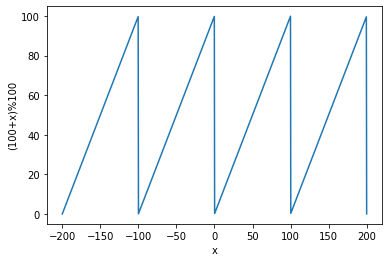

In [67]:
plt.plot(np.linspace(-200,200,1000),(100+np.linspace(-200,200,1000))%100)
plt.xlabel('x')
plt.ylabel('(100+x)%100')

In [90]:
@operator
class modulo:
    ain  = {'a' : 'ndarray'}
    aout = {'b': 'ndarray'}

    def apl(node, a, y):
        return dict(b = a%100)

    def vjp(node, _b, y):
        return dict(_a = _b)

    def jvp(node, a_, y):
        return dict(b_ = a_)

    
@autooperator('params->b')
def test_modulo(params,y):
    a = params*23.2
    b = modulo(a,y)
    return dict(b=b)

In [92]:
mod = test_modulo.build(y=np.ones(3)*14)
res, tape = mod.compute(init=dict(params=np.ones(3)*100),vout='b',return_tape=True)
res1 = mod.compute(init=dict(params=np.ones(3)*100.1),vout='b',return_tape=False)
res2 = mod.compute(init=dict(params=np.ones(3)*99.9),vout='b',return_tape=False)
jvp  = tape.get_jvp()
jvp_res =jvp.compute(init=dict(params_=0.2), vout='b_')
#print(res,res1,res2)
print((res1-res2), jvp_res)

[4.64 4.64 4.64] 4.64
